# Importation des packages


In [159]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
Les données concernent de diabet.

In [160]:
data=pd.read_csv("diabetes.csv",sep=",",index_col=0)

In [161]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [162]:
# Trouve et Suppression des doublons 
duplicates = data.duplicated()
duplicates

Pregnancies
6     False
1     False
8     False
1     False
0     False
      ...  
10    False
2     False
5     False
1     False
1     False
Length: 768, dtype: bool

In [163]:
# Compte des lignes dupliquées et non dupliquées
duplicates.value_counts()

False    768
dtype: int64

In [164]:
# Enlevons les lignes dupliquées - par rapport à la colonne -"age"-en gardant la 1e ligne
data = data.drop_duplicates(subset = ["Age"],keep="first")
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


# Qualité des données

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 6 to 8
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   52 non-null     int64  
 1   BloodPressure             52 non-null     int64  
 2   SkinThickness             52 non-null     int64  
 3   Insulin                   52 non-null     int64  
 4   BMI                       52 non-null     float64
 5   DiabetesPedigreeFunction  52 non-null     float64
 6   Age                       52 non-null     int64  
 7   Outcome                   52 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.7 KB


In [166]:
data.describe(include="all")

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,135.403846,72.115385,14.403846,73.596154,30.709615,0.583058,46.692308,0.480769
std,31.879220,21.260895,16.625352,158.330785,8.486789,0.460902,15.530537,0.504505
min,44.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.000000
25%,115.750000,66.000000,0.000000,0.000000,26.750000,0.254750,33.750000,0.000000
50%,135.500000,76.000000,0.000000,0.000000,32.000000,0.477000,46.500000,0.000000
75%,158.000000,82.500000,31.250000,89.500000,35.700000,0.698000,59.250000,1.000000
max,197.000000,104.000000,47.000000,846.000000,43.100000,2.288000,81.000000,1.000000


In [167]:
data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [168]:
data.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

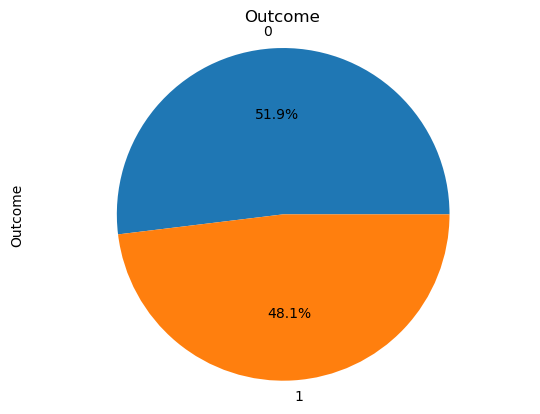

In [169]:
# Sélectionner les variables catégorielles
cat_vars = ['Outcome']


# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    data[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

In [170]:
from scipy.stats import chi2_contingency
# Sélectionner les variables catégorielles
cat_vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(data['Outcome'],data[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                   Variable       Chi2  P-valeur  V de Cramer
1             BloodPressure  30.568296  0.105293     0.399511
4                       BMI  47.994074  0.391929     0.146363
3                   Insulin  15.621862  0.407618     0.080180
0                   Glucose  43.320494  0.543288     0.000000
2             SkinThickness  17.207791  0.575793     0.000000
5  DiabetesPedigreeFunction  47.326420  0.500352     0.000000
6                       Age  52.000000  0.434732          NaN


C:\Users\ffoue\AppData\Local\Temp\ipykernel_35136\2271676786.py:24: RuntimeWarning: invalid value encountered in double_scalars
  cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))


<AxesSubplot:xlabel='Age', ylabel='Glucose'>

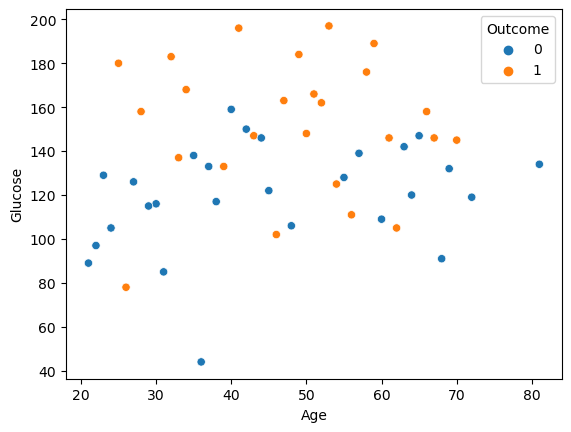

In [171]:
#faire un scatterplot pour afficher les classes 

sns.scatterplot(x="Age", y = "Glucose", data = data, hue="Outcome")

<AxesSubplot:>

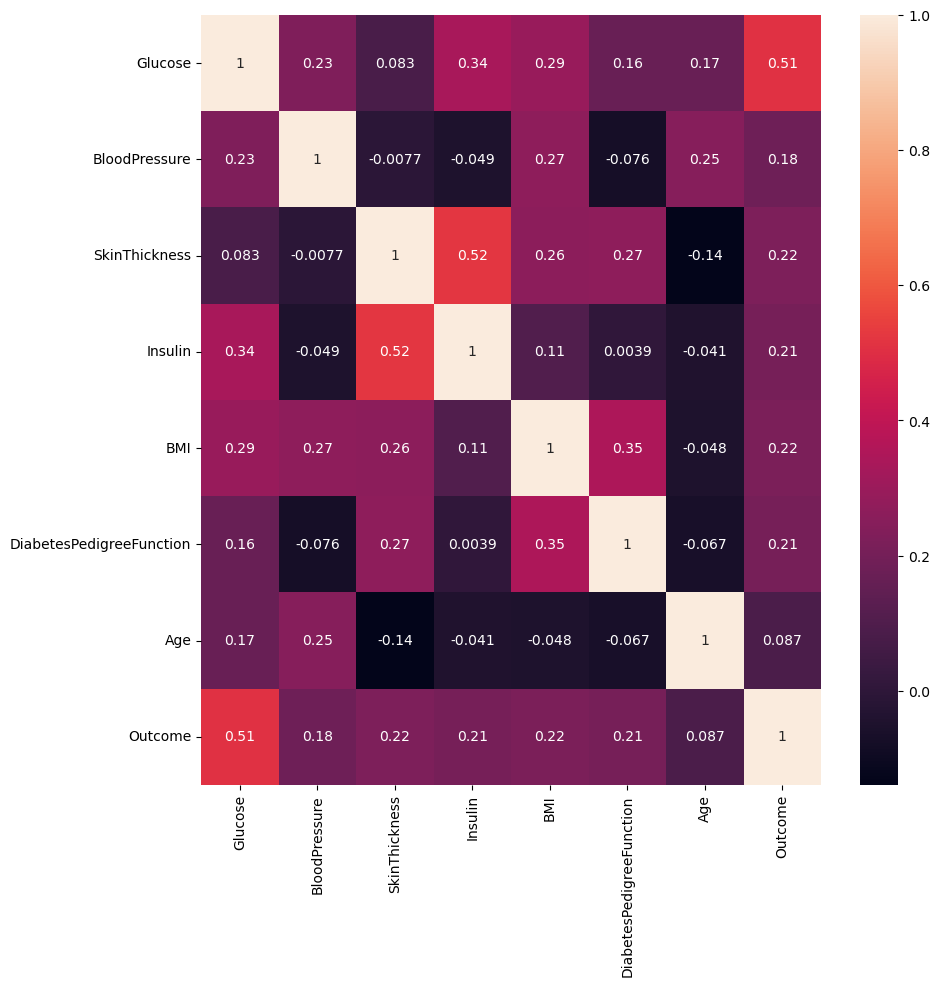

In [172]:
# matrixe de correlation
figure = plt.figure(figsize=(10,10)) 
sns.heatmap(data.corr(), annot= True)

# Modélisation

In [173]:
# séparer le futur du Target 

X = data.drop(['Outcome'], axis=1)
y = data[['Outcome']]

In [174]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=123)

In [175]:
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
3,78,50,32,88,31.0,0.248,26
7,105,0,0,0,0.0,0.305,24
5,147,78,0,0,33.7,0.218,65
7,106,92,18,0,22.7,0.235,48
9,184,85,15,0,30.0,1.213,49
7,196,90,0,0,39.8,0.451,41
7,159,64,0,0,27.4,0.294,40
8,120,78,0,0,25.0,0.409,64
10,115,0,0,0,35.3,0.134,29


In [176]:
# Standardisation 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
X_train

array([[-1.63696588, -0.78727002,  1.35099593,  0.82297636,  0.0359591 ,
        -0.69943969, -1.22401594],
       [-0.80488688, -2.8089604 , -0.75787577, -0.46756099, -3.07067133,
        -0.58593156, -1.35406763],
       [ 0.48945824,  0.34487659, -0.75787577, -0.46756099,  0.30653659,
        -0.75918081,  1.31199208],
       [-0.77406914,  0.9109499 ,  0.42836456, -0.46756099, -0.79581615,
        -0.72532751,  0.20655269],
       [ 1.62971465,  0.62791325,  0.23065784, -0.46756099, -0.06425479,
         1.22223308,  0.27157854],
       [ 1.99952754,  0.83008229, -0.75787577, -0.46756099,  0.91784129,
        -0.29519143, -0.24862824],
       [ 0.85927113, -0.22119671, -0.75787577, -0.46756099, -0.32481089,
        -0.60783664, -0.31365408],
       [-0.34262077,  0.34487659, -0.75787577, -0.46756099, -0.56532421,
        -0.378829  ,  1.24696624],
       [-0.49670947, -2.8089604 , -0.75787577, -0.46756099,  0.46687881,
        -0.92645595, -1.0289384 ],
       [ 0.82845339,  0.2640

In [178]:
# Creation du modèle 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
result = classifier.fit(X_train,y_train)

c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [179]:
# Cross_validation 

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier,
                             X=X_train, y= y_train, cv= 3)
print ('Cross Val Accuracis', (accuracies))

Cross Val Accuracis [0.41666667 0.45454545 0.72727273]


c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

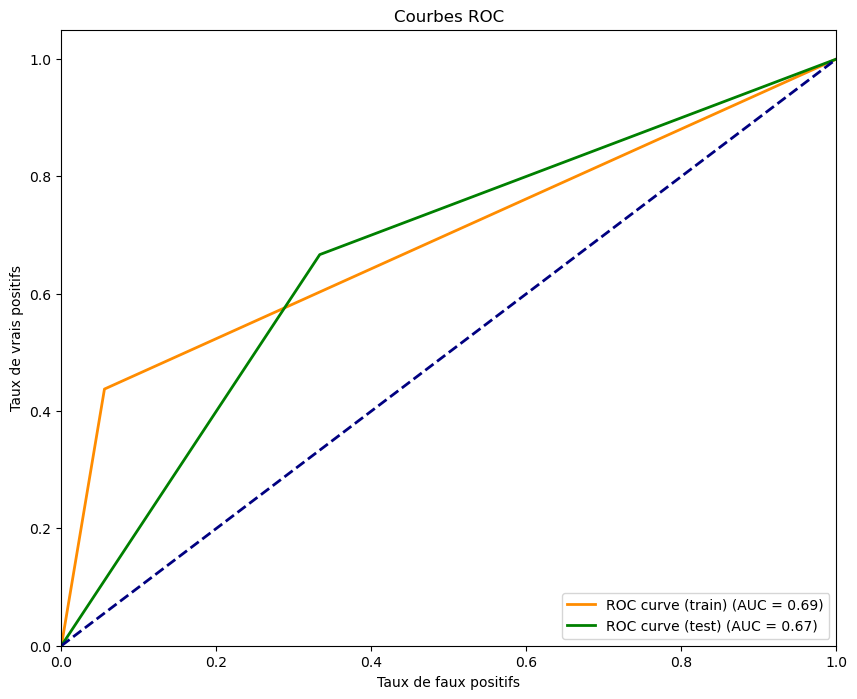

In [180]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

# Oversampling, Undersampling et Smote

### Oversampling ou Suréchantillonnage

L'oversampling est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en augmentant le nombre d'échantillons de la classe minoritaire. Cela peut être fait en dupliquant les échantillons existants ou en générant de nouveaux échantillons synthétiques à partir des données existantes, par exemple en utilisant des méthodes telles que SMOTE (Synthetic Minority Over-sampling Technique) ou ADASYN (Adaptive Synthetic Sampling).

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Facilite la découverte de modèles significatifs dans les données en permettant aux algorithmes d'apprentissage d'explorer plus en profondeur la structure de la classe minoritaire.

### Inconvénients

- Peut entraîner un surapprentissage, car les échantillons dupliqués ou synthétiques peuvent augmenter la complexité du modèle sans apporter d'informations nouvelles.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.

## Analyses

In [181]:
X_train

array([[-1.63696588, -0.78727002,  1.35099593,  0.82297636,  0.0359591 ,
        -0.69943969, -1.22401594],
       [-0.80488688, -2.8089604 , -0.75787577, -0.46756099, -3.07067133,
        -0.58593156, -1.35406763],
       [ 0.48945824,  0.34487659, -0.75787577, -0.46756099,  0.30653659,
        -0.75918081,  1.31199208],
       [-0.77406914,  0.9109499 ,  0.42836456, -0.46756099, -0.79581615,
        -0.72532751,  0.20655269],
       [ 1.62971465,  0.62791325,  0.23065784, -0.46756099, -0.06425479,
         1.22223308,  0.27157854],
       [ 1.99952754,  0.83008229, -0.75787577, -0.46756099,  0.91784129,
        -0.29519143, -0.24862824],
       [ 0.85927113, -0.22119671, -0.75787577, -0.46756099, -0.32481089,
        -0.60783664, -0.31365408],
       [-0.34262077,  0.34487659, -0.75787577, -0.46756099, -0.56532421,
        -0.378829  ,  1.24696624],
       [-0.49670947, -2.8089604 , -0.75787577, -0.46756099,  0.46687881,
        -0.92645595, -1.0289384 ],
       [ 0.82845339,  0.2640

In [182]:
# Importer les bibliothèques nécessaires
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=123)

# Appliquer l'oversampling sur les données d'apprentissage
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
data_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)

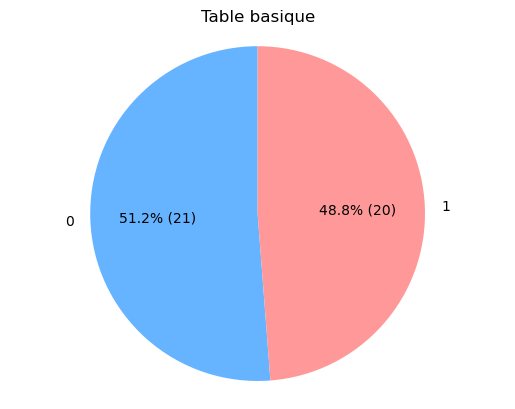

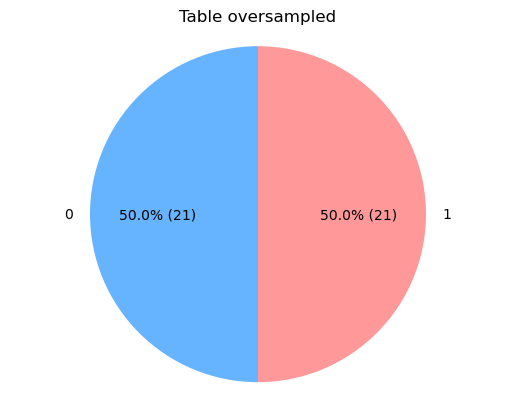

In [183]:
# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']
    
    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique")

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_oversampled, "Table oversampled")

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Entraîner et évaluer le modèle sur la base basique
Kn_basique = KNeighborsClassifier()
Kn_basique = Kn_basique.fit(X_train, y_train)
y_pred_basique = Kn_basique.predict(X_test)
y_pred_basique_train = Kn_basique.predict(X_train)
auc_basique = roc_auc_score(y_test, y_pred_basique)
auc_train_basique = roc_auc_score(y_train, y_pred_basique_train)
# Entraîner et évaluer la régression logistique sur la base oversampled
Kn_oversampled = KNeighborsClassifier()
Kn_oversampled = Kn_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = Kn_oversampled.predict(X_test)
auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)
y_pred_oversampled_train = Kn_oversampled.predict(X_train_oversampled)
auc_oversampled_train = roc_auc_score(y_train_oversampled, y_pred_oversampled_train)


c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [185]:
# Créer un DataFrame avec les performances
performances = pd.DataFrame({
    'Modèle': ['Base basique', 'Base oversampled'],
    'AUC - Entraînement': [auc_train_basique, auc_oversampled_train],
    'AUC - Test': [auc_basique, auc_oversampled]
})

# Afficher les performances
print(performances)

             Modèle  AUC - Entraînement  AUC - Test
0      Base basique            0.655952         0.8
1  Base oversampled            0.666667         0.8


# Undersampling ou sous échantillonage

L'undersampling est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en réduisant le nombre d'échantillons de la classe majoritaire. Cela peut être fait en supprimant aléatoirement des échantillons de la classe majoritaire ou en utilisant des méthodes plus sophistiquées telles que Tomek Links ou ENN (Edited Nearest Neighbors).

### Avantages

- Réduit la taille de l'ensemble de données, ce qui peut diminuer les temps d'apprentissage et de prédiction.
- Peut améliorer la performance du modèle sur la classe minoritaire en réduisant le biais envers la classe majoritaire.
- Élimine les échantillons bruyants ou redondants de la classe majoritaire, ce qui peut simplifier le modèle et éviter le surapprentissage.

### Inconvénients

- Peut entraîner une perte d'informations importantes en supprimant des échantillons de la classe majoritaire, ce qui peut nuire à la performance globale du modèle.
- Ne résout pas toujours le problème du déséquilibre des classes ; dans certains cas, l'oversampling ou d'autres techniques de rééchantillonnage peuvent être plus appropriées.
- Peut ne pas être efficace si la classe majoritaire contient de nombreuses sous-classes ou groupes distincts, car l'undersampling peut éliminer certains de ces groupes et réduire la capacité du modèle à les distinguer.

### Analyse



In [186]:
# Importer les bibliothèques nécessaires
from imblearn.under_sampling import RandomUnderSampler

# Initialiser l'objet RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=123)

# Appliquer l'undersampling sur les données d'apprentissage
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données undersampled
data_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

# Afficher la nouvelle distribution des données
print(data_undersampled['Outcome'].value_counts())

0    20
1    20
Name: Outcome, dtype: int64


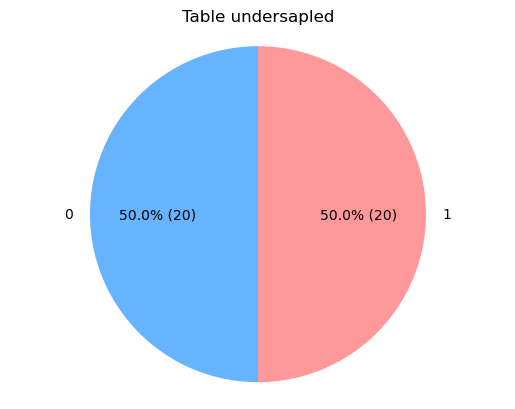

In [187]:
# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_undersampled, "Table undersapled")

# Impact sur le modèle

In [188]:
# Entraîner et évaluer du modèle sur la base undersampled

# Entraîner et évaluer la régression logistique sur la base oversampled
from sklearn.neighbors import KNeighborsClassifier
Kn_undersampled = KNeighborsClassifier()
Kn_undersampled = Kn_undersampled.fit(X_train_undersampled, y_train_undersampled,)


y_pred_undersampled = Kn_undersampled.predict(X_test)
auc_undersampled = roc_auc_score(y_test, y_pred_undersampled)

# Ajouter les performances de la base undersampled au DataFrame
performances.loc[2] = ['Base undersampled', auc_undersampled, auc_undersampled]

# Afficher les performances
print(performances)

              Modèle  AUC - Entraînement  AUC - Test
0       Base basique            0.655952         0.8
1   Base oversampled            0.666667         0.8
2  Base undersampled            0.800000         0.8


c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [190]:
# On peut conclure  que l'undersampling est la meilleure technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés

In [191]:
real_data = sc.transform(np.array([[132,57,34,0,27,2.1,32]]))
predict_real_data = Kn_undersampled.predict(real_data)
predict_real_data

c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\ffoue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)